In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

In [4]:
trainpath = '../input/cell-images/cell_images/train/'
testpath = '../input/cell-images/cell_images/valid/'

In [5]:
for folder in os.listdir(trainpath):
    files = gb.glob(pathname= str(trainpath+folder + "/*.png"))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 11023 in folder Uninfected
For training data , found 11023 in folder Parasitized


In [6]:
for folder in os.listdir(testpath):
    files = gb.glob(pathname= str(testpath+folder + "/*.png"))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2756 in folder Uninfected
For training data , found 2756 in folder Parasitized


In [7]:
size = []
for folder in os.listdir(trainpath):
    files = gb.glob(pathname=str(trainpath+folder+'/*.png'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
        
        
pd.Series(size).value_counts()

(50, 50)    22046
dtype: int64

In [8]:
size = []
for folder in os.listdir(testpath):
    files = gb.glob(pathname=str(testpath+folder+'/*.png'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
        
        
pd.Series(size).value_counts()

(50, 50)    5512
dtype: int64

In [10]:
code = {'Parasitized':0,'Uninfected':1}
 
def getcode(n):
    for x,y in code.items():
        if n == y:
            return x

# Reading Data

In [40]:
s = 64 # size of each image

In [41]:
X_train = []
y_train = []
for folder in os.listdir(trainpath):
    files = gb.glob(pathname = str(trainpath +folder + '/*.png'))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image,(s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

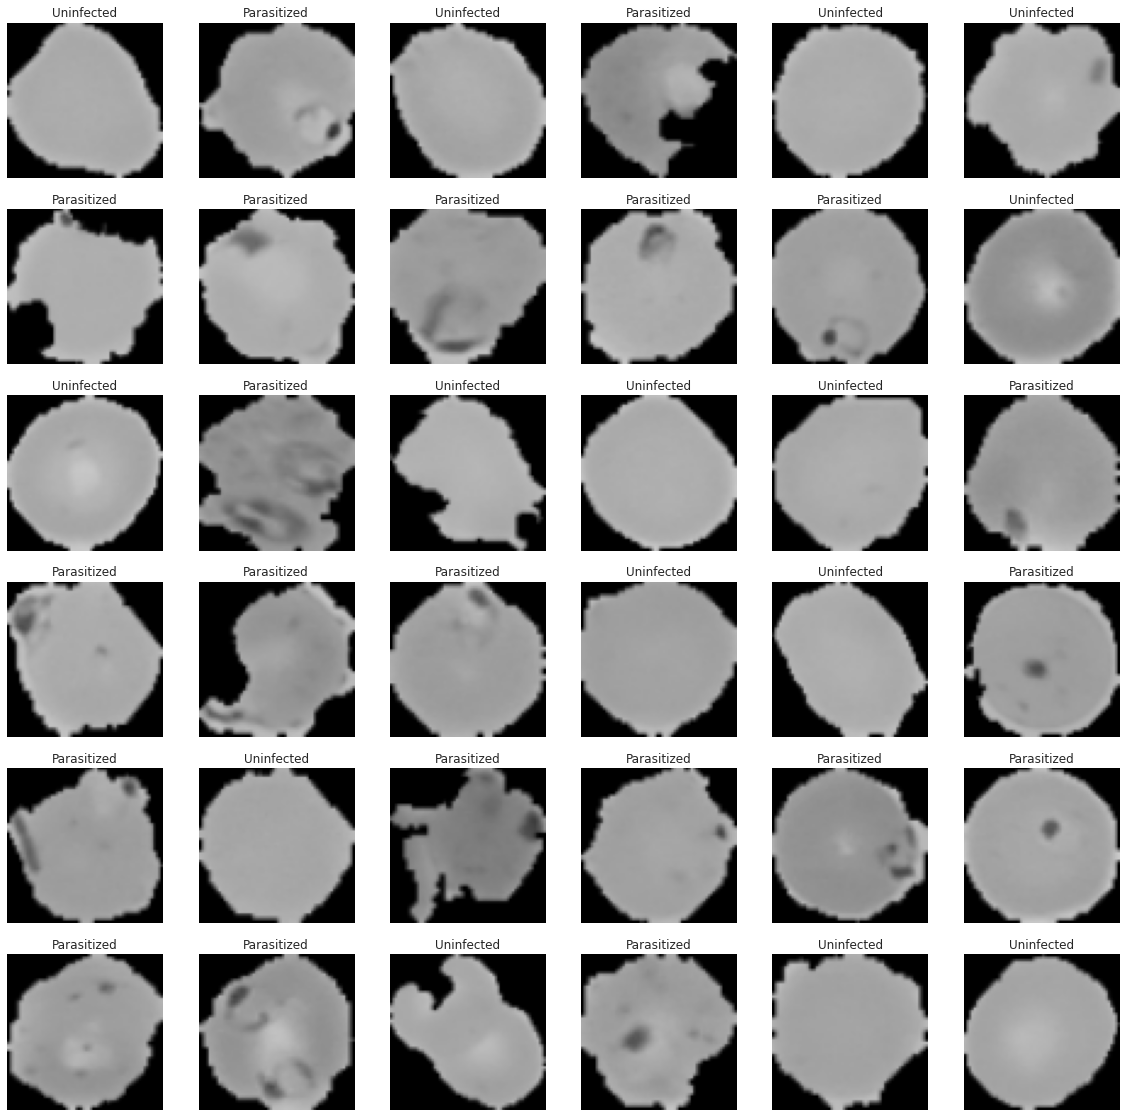

In [42]:
plt.figure(figsize=(20,20))
for n, i in enumerate(np.random.randint(0,len(X_train),36)):
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [43]:
print(f'we have {len(X_train)} items in X_train')

we have 22046 items in X_train


In [44]:
X_test = []
y_test = []
for folder in os.listdir(testpath):
    files = gb.glob(pathname = str(testpath +folder + '/*.png'))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image,(s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

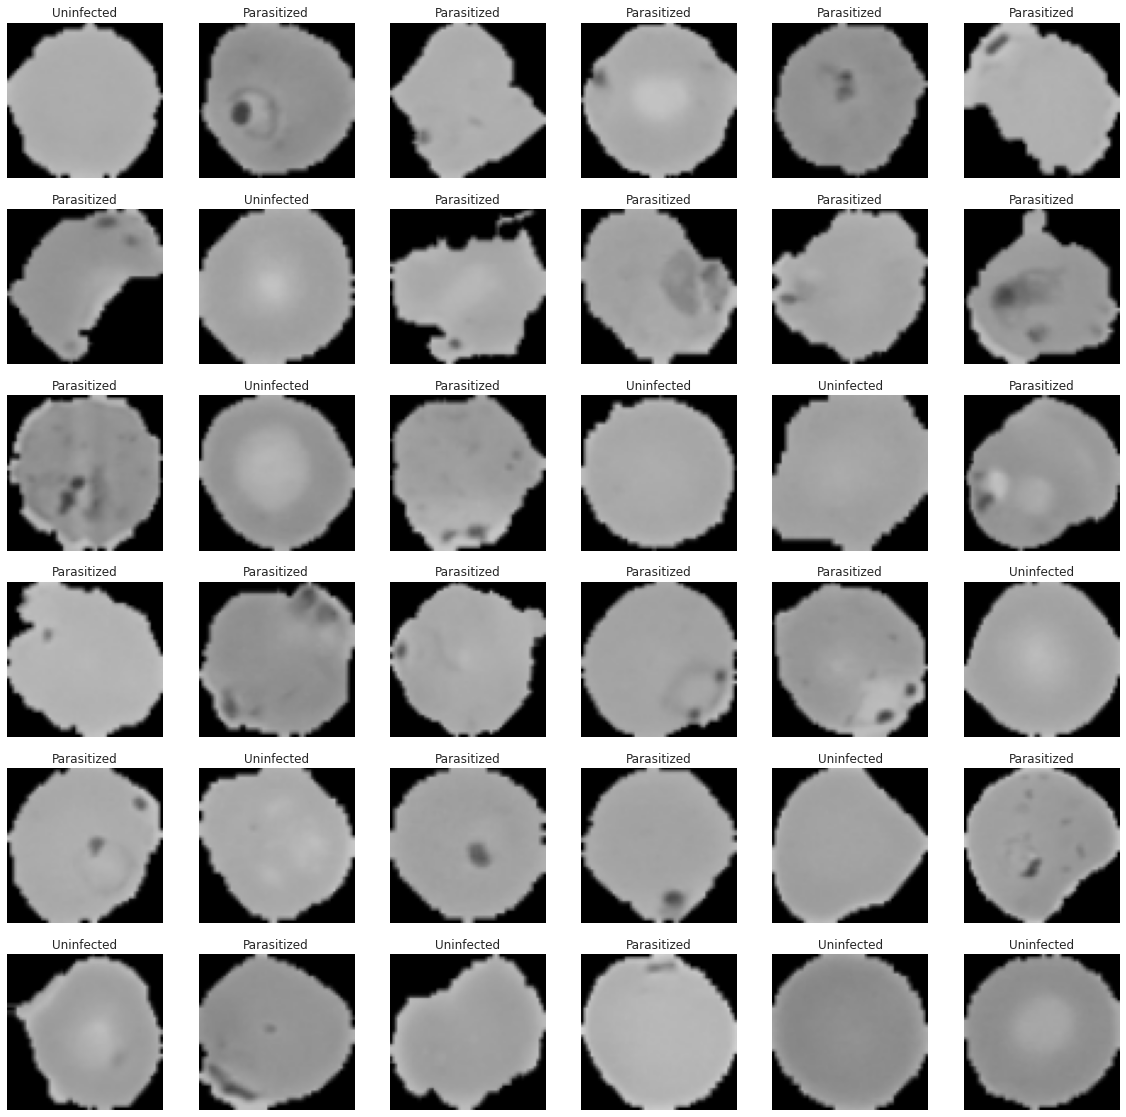

In [45]:
plt.figure(figsize=(20,20))
for n, i in enumerate(np.random.randint(0,len(X_test),36)):
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [46]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape is {X_train.shape}')
print(f'X_test shape is {X_test.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'y_test shape is {y_test.shape}')

X_train shape is (22046, 64, 64, 3)
X_test shape is (5512, 64, 64, 3)
y_train shape is (22046,)
y_test shape is (5512,)


In [51]:
kerasModel = keras.models.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    
])

In [52]:
kerasModel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
print('Model Details are: ')
print(kerasModel.summary())

Model Details are: 
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_23 (Dense)             (None

In [54]:
epochs = 50
ThisModel = kerasModel.fit(X_train,y_train,epochs=epochs,verbose=1)

Epoch 1/50
689/689 [==============================] - 56s 81ms/step - loss: 4.4176 - accuracy: 0.5712
Epoch 2/50
689/689 [==============================] - 56s 81ms/step - loss: 0.6260 - accuracy: 0.6478
Epoch 3/50
689/689 [==============================] - 56s 82ms/step - loss: 0.5909 - accuracy: 0.6849
Epoch 4/50
689/689 [==============================] - 56s 81ms/step - loss: 0.5555 - accuracy: 0.7159
Epoch 5/50
689/689 [==============================] - 56s 81ms/step - loss: 0.5132 - accuracy: 0.7364
Epoch 6/50
689/689 [==============================] - 56s 81ms/step - loss: 0.4714 - accuracy: 0.7605
Epoch 7/50
689/689 [==============================] - 56s 81ms/step - loss: 0.4318 - accuracy: 0.7890
Epoch 8/50
689/689 [==============================] - 55s 81ms/step - loss: 0.3991 - accuracy: 0.8113
Epoch 9/50
689/689 [==============================] - 56s 81ms/step - loss: 0.3824 - accuracy: 0.8169
Epoch 10/50
689/689 [==============================] - 55s 80ms/step - loss: 0.351

In [55]:
ModelLoss, ModelAccuracy = kerasModel.evaluate(X_test,y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy))

173/173 [==============================] - 4s 21ms/step - loss: 1.8649 - accuracy: 0.8850
Test Loss is 1.8649303913116455
Test Accuracy is 0.8849782347679138


<AxesSubplot:>

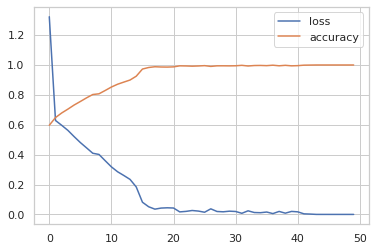

In [56]:
curves = pd.DataFrame(ThisModel.history)
curves.plot()

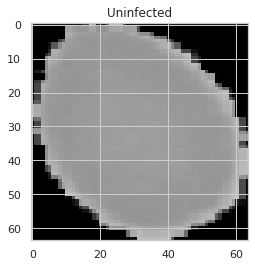

In [67]:
from keras.preprocessing import image
test_image1= image.load_img('../input/cell-images/cell_images/random1.png', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis=0)
result = kerasModel.predict(test_image)
plt.title(getcode(result))
plt.imshow(test_image1)

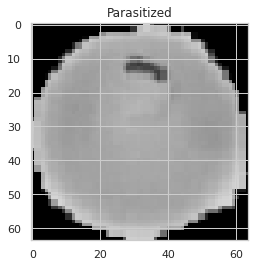

In [68]:
from keras.preprocessing import image
test_image1= image.load_img('../input/cell-images/cell_images/random2.png', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis=0)
result = kerasModel.predict(test_image)
plt.title(getcode(result))
plt.imshow(test_image1)

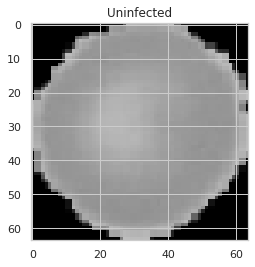

In [69]:
from keras.preprocessing import image
test_image1= image.load_img('../input/cell-images/cell_images/random3.png', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis=0)
result = kerasModel.predict(test_image)
plt.title(getcode(result))
plt.imshow(test_image1)

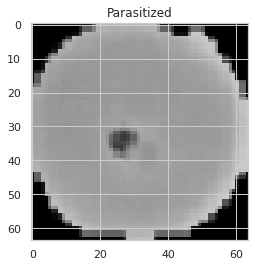

In [70]:
from keras.preprocessing import image
test_image1= image.load_img('../input/cell-images/cell_images/random4.png', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis=0)
result = kerasModel.predict(test_image)
plt.title(getcode(result))
plt.imshow(test_image1)